# **Análisis de Calidad de Vino Utilizando Machine Learning**

**Encargado:** José Max Barrrios lara

puede descargar conjunto de datos en el siguiente enlace de: https://archive.ics.uci.edu/ml/datasets/Wine+Quality




## **Asignaciones:** 
-Predice la calidad del vino utilizando únicamente ML clásico
-Logra un Accuracy Mayor al 90%

-¿Que otras metricas se pueden utilizar para saber si el modelo es bueno?

-¿Que problema ves con el dataset?

-¿Que variables afectan mayormente al modelo? *texto en cursiva*

In [642]:
#Accesing to my Google Drive Account to take the Dataset
# Google file system
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [0]:
#Importando librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
plt.style.use('ggplot')

In [0]:
#Descargando Dataset de vinos
RTT_File= "/gdrive/My Drive/Banistmo/winequality.csv"

In [645]:
wine = pd.read_csv(RTT_File, sep=';')
wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [646]:
#Verificar si tiene  algun valor nulo
wine.isnull().sum().sum()
#No Na Values

0

In [647]:
#Descripción numeerica de nuestro dataset
wine.describe()
#Tenemos valores muy distintos por lo que habra que normalizar mas adelante

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [648]:
#Que tipo de valores tenemos
wine.info()
#Todos son flotantes y Entero la calidad que seria el target

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [649]:
#Renombraremos el nombre de las columnas para trabajarlo mejor
wine.columns=['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality']
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [0]:
#Creando Dataset de Backup con datos originales
wine_back = wine

## **Explorando Datos de calidad de vinos**

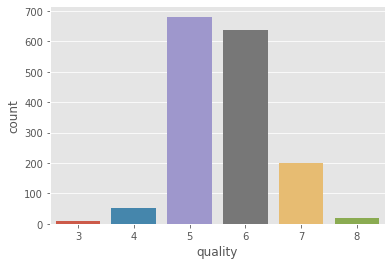

In [651]:
plot = sns.countplot(data=wine, x='quality')
#Vemos que la mayor cantidad esta en el vino con calidad 6, por lo tanto podemos decir que son vinos "normales" la mayoria , no existen de calidad 1,2 ,9, 10

## **Resultados**

Podemos observar que los datos estan bastante sesgados para vinos con calidad pordría decirse que normal(calidad 5 y 6) por lo que podría presentar más adelante alguna dificultad al momento de encajar nuestro modelo de ML,

In [652]:
#Estos serian los valores relacionados a cada uno de los vinos
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## **Filtrando Caracteristicas por correlación**

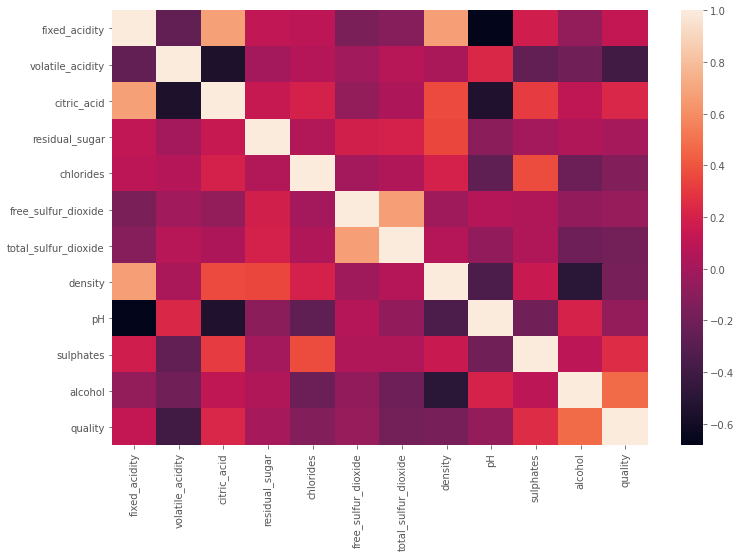

In [653]:
fig_Dims = (12,8)
fig, ax = plt.subplots(figsize=fig_Dims)
sns.heatmap(wine.corr(),ax=ax)
plt.show()

In [654]:
#Vemos que algunas caracteristicas tienen una correlacion muy pobre con la calidad, por lo que no es tan importante para nuestro modelo
abs(wine.corr()['quality'])

fixed_acidity           0.124052
volatile_acidity        0.390558
citric_acid             0.226373
residual_sugar          0.013732
chlorides               0.128907
free_sulfur_dioxide     0.050656
total_sulfur_dioxide    0.185100
density                 0.174919
pH                      0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [655]:
#Quitemos todos los features que tengan menos de 10%
wine = wine.drop(columns=['residual_sugar','free_sulfur_dioxide','pH'])
wine

,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,density,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,5
1,7.8,0.880,0.00,0.098,67.0,0.99680,0.68,9.8,5
2,7.8,0.760,0.04,0.092,54.0,0.99700,0.65,9.8,5
3,11.2,0.280,0.56,0.075,60.0,0.99800,0.58,9.8,6
4,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,44.0,0.99490,0.58,10.5,5
1595,5.9,0.550,0.10,0.062,51.0,0.99512,0.76,11.2,6
1596,6.3,0.510,0.13,0.076,40.0,0.99574,0.75,11.0,6
1597,5.9,0.645,0.12,0.075,44.0,0.99547,0.71,10.2,5


# **Machine Learning Approach - Minimun Accuracy 90%**

Para este Enunciado debemos predecir la calidad de vino, utilizando un algoritmo de Machine Learning Clásico.


## **Primer Enfoque**

Intentaremos ajustar nuestros algoritmos de Machine Learning, con las calidades existentes [0-10]

In [0]:
#Importando Librerias
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [657]:
#Creando un dataset eliminando la columna target.
X = wine.iloc[:, 0:8]
X

,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,density,sulphates,alcohol
0,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4
1,7.8,0.880,0.00,0.098,67.0,0.99680,0.68,9.8
2,7.8,0.760,0.04,0.092,54.0,0.99700,0.65,9.8
3,11.2,0.280,0.56,0.075,60.0,0.99800,0.58,9.8
4,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4
...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,44.0,0.99490,0.58,10.5
1595,5.9,0.550,0.10,0.062,51.0,0.99512,0.76,11.2
1596,6.3,0.510,0.13,0.076,40.0,0.99574,0.75,11.0
1597,5.9,0.645,0.12,0.075,44.0,0.99547,0.71,10.2


In [0]:
#Creando Dataset con los valores de label
y = wine.iloc[:,-1]

In [0]:
#Normalizando valores entre  -1 y 1
X = preprocessing.StandardScaler().fit_transform(X)

## **Train y Test Split**

In [0]:
#K-Nearest Neighbor
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 1)
#Support vector Machine
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X,y, test_size=0.2, random_state = 1)
#Logistic regression
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X,y, test_size=0.2, random_state = 1)
#Random Forest
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X,y, test_size=0.2, random_state = 1)
#Linear Discriminant Analysis
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X, y, test_size = 0.2, random_state = 42)

## **K-nearest Neighbor**

In [0]:
## Elegimos 40 como cantidad de vecinos porque es la raiz cuadrada de la cantidad de observaciones
knnmodel= KNeighborsClassifier(n_neighbors=40)
knnmodel.fit(X_train,y_train)
y_predict1 = knnmodel.predict(X_test)

In [662]:
#Buscando el accuracy para nuestro modelo
acc = accuracy_score(y_test, y_predict1)
print(f'El accuracy para el algorimto KNN es de: ',acc)

El accuracy para el algorimto KNN es de:  0.63125


In [663]:
#veremos reporte de clasificación
print(classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.67      0.80      0.73       140
           6       0.63      0.61      0.62       134
           7       0.36      0.27      0.31        30
           8       0.00      0.00      0.00         2

    accuracy                           0.63       320
   macro avg       0.28      0.28      0.28       320
weighted avg       0.59      0.63      0.61       320



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Support Vector Machine**

In [664]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_s, y_train_s)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [665]:
y_pred_s= svclassifier.predict(X_test_s)
svm_acc = accuracy_score(y_test_s, y_pred_s)
print(f'El Accuracy para El algoritmo de Support Vector Machine es de: {svm_acc} ')

El Accuracy para El algoritmo de Support Vector Machine es de: 0.625 


In [666]:
#Veremos el reporte de clasificación
print(classification_report(y_test_s, y_pred_s))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.66      0.78      0.71       140
           6       0.59      0.68      0.63       134
           7       0.00      0.00      0.00        30
           8       0.00      0.00      0.00         2

    accuracy                           0.62       320
   macro avg       0.21      0.24      0.22       320
weighted avg       0.53      0.62      0.58       320



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Logistic Regression**


In [0]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train_lr, y_train_lr)

In [668]:
#Buscando accuracy de model
y_pred_lr = clf.predict(X_test_lr)
lr_acc = accuracy_score(y_test_lr, y_pred_lr)
print(f'EL accuracy para el algorimto de Logistic Regression es de:{lr_acc}')

EL accuracy para el algorimto de Logistic Regression es de:0.596875


In [669]:
#Veamos otras metricas para nuestro modelo
print(classification_report(y_test_lr, y_pred_lr))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.08      0.14        13
           5       0.66      0.75      0.70       140
           6       0.58      0.59      0.58       134
           7       0.27      0.20      0.23        30
           8       0.00      0.00      0.00         2

    accuracy                           0.60       320
   macro avg       0.42      0.27      0.28       320
weighted avg       0.59      0.60      0.58       320



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###  **Random Forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train_rf, y_train_rf)
pred_rfc = rfc.predict(X_test_rf)

In [671]:
#veamos otras métricas para nuestro modelo
print(classification_report(y_test_rf, pred_rfc))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.76      0.81      0.78       140
           6       0.69      0.75      0.72       134
           7       0.58      0.47      0.52        30
           8       1.00      0.50      0.67         2

    accuracy                           0.71       320
   macro avg       0.51      0.42      0.45       320
weighted avg       0.68      0.71      0.70       320



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [672]:
rf_acc = accuracy_score(y_test,pred_rfc)
print(f'El accuracy del algoritmo random forest es de: {rf_acc}')

El accuracy del algoritmo random forest es de: 0.7125


## **Linear Discriminant Analysis**

In [0]:
#Importando modulos
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
x_array = np.array(X)
y_array = np.array(y)

In [674]:
#Fitting the model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_a,y_train_a)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [675]:
#Midiendo la efectividad del model
y_pred_lin = lda.predict(X_test_a)
ld_acc = accuracy_score(y_test_a, y_pred_lin)
print(f'El accuracy para el algoritmo de linear discriminant Analysis es de: {ld_acc}')

El accuracy para el algoritmo de linear discriminant Analysis es de: 0.55


In [676]:
#Veamos que tal lo ha hecho el modelo con diferentes metricas
print(classification_report(y_test_a, y_pred_lin))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.63      0.77      0.69       130
           6       0.52      0.49      0.51       132
           7       0.31      0.26      0.29        42
           8       0.00      0.00      0.00         5

    accuracy                           0.55       320
   macro avg       0.24      0.25      0.25       320
weighted avg       0.51      0.55      0.53       320



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Resultados Primer Experimento**
Debido a que la información esta muy sesgada (calidad 5,6) para las calidades de vinos, utilizaremos un enfoque distinto para mejorar nuestros resultados

# **Segundo Enfoque**

Clasificaremos los vinos de la siguiente manera:

Calidad menor o igual a 3 = **Calidad Baja**

Calidad Mayor de 3 y menor o igual a 7 = **Calidad Estandard**

Calidad Mayor de 7 = **Alta calidad**

In [0]:
#Creando funcion para calida de vino 1= calidad baja, 2=calidad Standard, 3=alta calidad
def calidad(vino):
  if vino >= 1 and vino <= 3:
        return '1'
  elif vino >= 4 and vino <= 7:
        return '2'
  elif vino >= 8 and vino <= 10:
        return '3'

In [678]:
wine_back['Calidades'] = wine_back['quality'].apply(calidad)
wine_back

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Calidades
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,2


In [679]:
#Conteo de valores
print(wine_back['Calidades'].value_counts())

2    1571
3      18
1      10
Name: Calidades, dtype: int64


In [680]:
#Separando Valors de Target
X= wine_back.iloc[:,:11]
y = wine_back['Calidades']
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


## **Data Normalization**

In [0]:
#Normalizando Valores para datos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X2 = sc.fit_transform(X2)

## **PCA**

Utiizaremos un enfoque distinto, trataremos de encajar un Principal Component Analysis con la idea darle mayor ponderancia a las variables significativas, en ves de eliminarlas.

In [0]:
from sklearn.decomposition import PCA
pca = PCA()
pca_x = pca.fit_transform(X2)

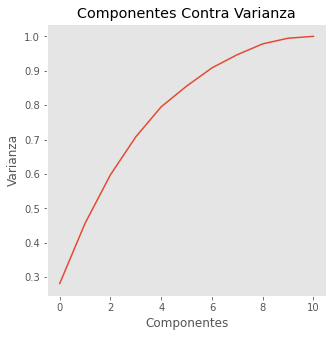

In [683]:
#Buscando Elegir cuantos Componentes con respecto a la varianzza
plt.figure(figsize=(5,5))
plt.xlabel('Componentes')
plt.ylabel('Varianza')
plt.title('Componentes Contra Varianza')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()

In [0]:
#Eligiriremos 8 componentes principañes, ya que representan aproximadamente un 90% de la variación en nuestros datos
pca_componentes = PCA(n_components=8)
x_pca = pca_componentes.fit_transform(X2)

## **Data Partition**

In [0]:
from sklearn.model_selection import train_test_split
x_train_w2, x_test_w2, y_train_w2, y_test_w2 = train_test_split(x_pca, y2, test_size = 0.25)

## **Random Forest**

En  el primer enfoque, el algoritmo de Random Fores ha sido el que mejor accuracy nos ha dado, por lo que volveremos a utilizarlo

In [0]:
#Encajando el algoritmo de Random forest. No volvemos a imporotar modulos ya que lo importamos arriba
random_forest = RandomForestClassifier()
random_forest.fit(x_train_w2, y_train_w2)
rf_prediccion= random_forest.predict(x_test_w2)

In [687]:
#print confusion matrix and accuracy score
rfmatrix= confusion_matrix(y_test_w2, rf_predict)
rf_accuracy = accuracy_score(y_test_w2, rf_predict)
print(rfmatrix)


[[  0   3   0]
 [  0 392   0]
 [  0   5   0]]


In [688]:
print(f'El accuracy para nuestro modelo ha sido de {rf_accuracy}')

El accuracy para nuestro modelo ha sido de 0.98


In [689]:
#Veremos demas metricas como Precision, Recall, F1-Measure
print(classification_report(y_test_w2, rf_predict))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.98      1.00      0.99       392
           3       0.00      0.00      0.00         5

    accuracy                           0.98       400
   macro avg       0.33      0.33      0.33       400
weighted avg       0.96      0.98      0.97       400



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Resultados Segundo Experimento**

En esta ocasión reduciendo las calidades de vinos a sólo 3, y realizando un PCA,
hemos mejorado nuestro accuracy a lo deseado (encima del 90%)

## **Confusion Matrix**

Graficaremos la Matriz de Confusión del Random Forest

In [690]:
#Matriz de confusion
cm = confusion_matrix(y_test_w2, rf_predict)
cm

array([[  0,   3,   0],
       [  0, 392,   0],
       [  0,   5,   0]])

In [0]:
#Función para encajar la matriz de confusión con varias variables
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f};'.format(accuracy, misclass))
    plt.show()

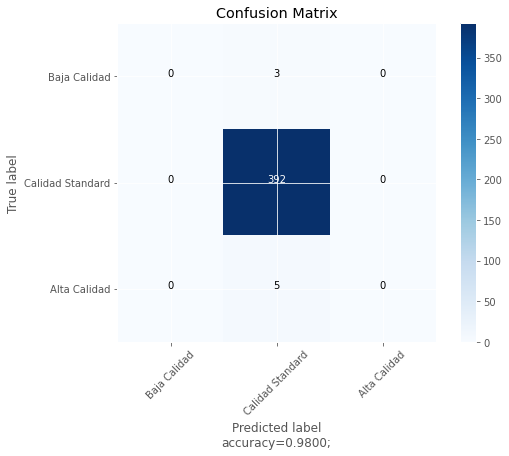

In [696]:
#Graficando Matriz de Confusión
plot_confusion_matrix(cm           = np.array([[  0,   3,   0],
                                                [  0, 392,   0],
                                                [  0,   5,   0]]),
      
                      normalize = False,
                      target_names = ['Baja Calidad','Calidad Standard','Alta Calidad'],
                      title        = "Confusion Matrix")

# **Resultados y Conclusiones**
**-Predice la calidad del vino utilizando únicamente ML clásico y alcanza 90%**

## **Primer Enfoque**   

  **1.KNN:** 63.12% de Accuracy

  **2.SVM:** 62.5% de Accuracy

  **3.Logistic Regression:** 59.68% de Accuracy

  **4.Random Forest:** 71.25% de Accuracy

  **5.Linear Discriminant** Analysis: 55% de Accuracy

 ## **6.Random Forest (Segundo Enfoque):** 98% de Accuracy

**-¿Que otras metricas se pueden utilizar para saber si el modelo es bueno?**

Ademas del Accuracy  Utilizamos las siguientes métricas

**precision:** habla sobre que tan exacto es su modelo de los positivos predichos, cuántos de ellos son realmente positivos.

**recall:**: calcula cuántos de los Positivos reales captura nuestro modelo al etiquetarlo como Positivo.

**f1-score:** Es una medida que busca un balance entre la precision y el recall.
Todas estas tienen su formula, pero por el momento no lo agregaremos a texto.


**-¿Que problema ves con el dataset?**

El problema principal encontrado, fue que existen muy pocos datos, para ciertas clases de calidades de vinos esta muy sesgado. Por ejemplo las clases  5 y 6 que podriamos decir, que son vinos "Estandar" existe casi toda la inforamción. Pero si quisieramos sólo centrarnos en vinos de baja calidad o alta calidad, tendriamos que buscar màs datos. Por lo que lo más sensato(en mi opinion) era de reducir las clases de calidades de vino, para que los datos se distribuyeran un poco mejor.

Otro problema encontrado fue que al momento de encajar un modelo de machine learning con todas las variables, este daban resultados muy pobres. por lo que luego se dedujo que algunas variables  contribuian muy poco o casi en nada al modelo y se consideraban información basura.


**-¿Que variables afectan mayormente al modelo?**

Luego del problema descrito en el punto anterior, se realizo un análisis de correlación para determinar cuales variables explicaban mejor el modelo.

Si bien es cierto que mejoro la efectividad al eliminar las variables que contenian menos de 10% de correlación, pero no se alcanzaba a la efectividad deseada.

Por lo que se tuvo que realizar un PCA para reducir el número de variables sin perder información.

Luego de realizar el modelo y se determino que aproximadamente 8 componentes principales, atribuyen un 90% de la variación en los datos, por lo que eligieron los primeros 8 componentes para realizar nuestra predicción. 


Se pudieron utilizar por ejemplo un algoritmo de feature selection, o un análisis de regresión lineal que te indica que variables son estadisticamente significativas para encajar el modelo, pero esto no garantizaba de igual manera que el accuracy fuese alto. por lo que se decidio realizar el PCA.

Hay que decir que las variables en general no tenian realmente una fuerte correlación con la calidad, así que decidi eliminar las que tuviesen menos de 10% de correlación.

Luego de hacer un analisis de correlación, estas son las variables que menos aportaban al modelo:

**residual_sugar**

**'free sulfur dioxide**

**'pH**

por lo que las variables restantantes, si bien es cierto que explican un poco mejor el modelo, no tienen realmente una correlación tan fuerte.

Por lo que el mejor resultado se llevo a cabo con el PCA.
